<h1>Détermination des paramètres d'un modèle</h1>
<h2>Jeu de donnée</h2>
<p>Nous allons utiliser le jeu de donnée IRIS.</p>

In [4]:
from sklearn import datasets,svm,mixture, linear_model

import matplotlib.pyplot as plt
import numpy  as n
#import stat_user as ns
data = datasets.load_iris().data
tar = datasets.load_iris().target

<h2>Taille de la population</h2>
<p>Nous allons tester l'influence de la taille de la population dans la performance du modèle.
La population totale est partagée en deux échantillons. Un échantillon d'entrainement et un échantillon test.
Nous allons donc faire varier la part de l'échantillon d'entrainement de 0 à 95%.
Le jeu de donnée est fourni ordonnée par classe. Il sera donc mélangé au préalable.</p>

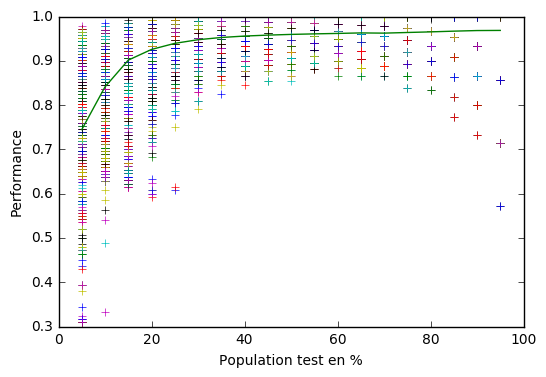

In [21]:
N1 = 1000
pop = n.arange(5,100,5)
res = n.zeros((N1,len(pop)))
res2 = n.zeros(len(pop))
plt.figure(1)
plt.xlabel("Population test en %")
plt.ylabel("Performance")
for k in range(N1):
    iris = ns.new_set(data,tar)
    for i, j in zip(pop,range(len(pop))):
        iris.update_ratio(i)
        clf = svm.SVC(gamma=0.001,C=100)
        clf.fit(iris.data_train,iris.target_train)
        x = clf.predict(iris.data_test)
        res[k,j]= iris.performance(x)
    plt.plot(pop,res[k,:],'+')

plt.figure(1)
for i in range(len(pop)):
    res2[i]=ns.esperance(res[:,i])
plt.plot(pop,res2,'-')
plt.show()

On remarque qu'en utilisant que 35% de l'échantillon pour l'entrainement, on obtient une performance de plus de 80%. Dans la suite nous choisirons une population d'entrainement de 40%.
<h2>Optimisation des paramètres</h2>
Nous utilisons pour ce cas test le modèle svm.SVC. Nous allons faire varier les paramètres gamma et C de manière à obtenir le modèle le plus performant.
Dans le code suivant nous faisons varier gamma et C dans les intervalles suivants [0.001;100] et [1;1000]

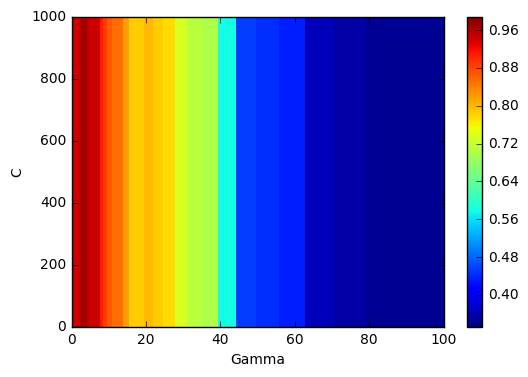

In [26]:
N = 100
gamma = n.logspace(-3,2,N)
C = n.logspace(0,3,N)
res = n.zeros((len(gamma),len(C)))

iris = ns.new_set(data,tar,40)
for i in range(len(gamma)):
    for j in range(len(C)):
        clf = svm.SVC(gamma=gamma[i],C=C[j])
        clf.fit(iris.data_train,iris.target_train)
        x = clf.predict(iris.data_test)
        res[i,j]= iris.performance(x)
        del clf


x,y = n.meshgrid(gamma,C)
plt.figure()
plt.pcolor(x,y,res.T)
plt.xlabel("Gamma")
plt.ylabel("C")
plt.colorbar()
plt.show()

On remarque clairement que les performances dépandent très peu de C.
En affinant les intervalles on peut trouver une série de couple (gamma, C) optimal pour notre programme.


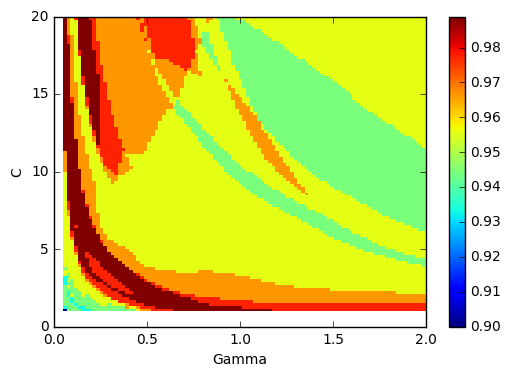

In [8]:
N = 100
gamma = n.linspace(0.05,2,N)
C = n.linspace(1,20,N)
res = n.zeros((len(gamma),len(C)))

iris = ns.new_set(data,tar,40)
for i in range(len(gamma)):
    for j in range(len(C)):
        clf = svm.SVC(gamma=gamma[i],C=C[j])
        clf.fit(iris.data_train,iris.target_train)
        x = clf.predict(iris.data_test)
        res[i,j]= iris.performance(x)
        del clf


x,y = n.meshgrid(gamma,C)
plt.figure()
plt.pcolor(x,y,res.T)
plt.xlabel("Gamma")
plt.ylabel("C")
plt.colorbar()
plt.show()

Les zones les plus rouges foncées correspondent aux couples (gamma, C) optimals.
Nous choisissons arbitrairement le couple (0.05,13.3). 
<h2>Conclusion</h2>
Nous allons ici comparer les performances en utilisant les paramètres par défaut et les paramètres trouvés

In [6]:
j = 0
l1 = 0
l2 = 0
for i in range(1000):
    j+=1
    iris = ns.new_set(data,tar,70)
    clf = svm.SVC(gamma=0.05,C=13.3)
    clf.fit(iris.data_train,iris.target_train)
    x = clf.predict(iris.data_test)
    l1+= iris.performance(x)
    del clf
    clf = svm.SVC(gamma=0.001,C=100)
    clf.fit(iris.data_train,iris.target_train)
    x = clf.predict(iris.data_test)
    l2+= iris.performance(x)
print(l1/j,l2/j)

0.9737999999999907 0.964111111111102


Les paramètres trouvés permettent d'améliorer la qualité des prédictions.